In [12]:
import datatable
import numpy as np
from numpy.lib.function_base import disp
import seaborn as sns 
import datatable
import pandas as pd
from my_module import *
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from IPython.display import display
pd.set_option("display.max_columns", None)
import os
import kaplanmeier as km

In [13]:
DATA_PATH = '/home/lkh256/Studio/VO2max_Prediction/Data/Survival_set'
df_init = datatable.fread(os.path.join(DATA_PATH, 'M_general_eq_survival.csv'), encoding='utf-8-sig', na_strings=['', 'NA']).to_pandas()
display(df_init.head())

,HPCID,SM_DATE,AGE,sex,death,delta_time,visit_num,CRF,ABRP_VO2max,ABRP_CRF,ABR_VO2max,ABR_CRF,ABP_VO2max,ABP_CRF,APRP_VO2max,APRP_CRF,APR_VO2max,APR_CRF,APP_VO2max,APP_CRF,CRF_tertile,CRF_tertile_nm,ABRP_CRF_tertile,ABRP_CRF_tertile_nm,ABR_CRF_tertile,ABR_CRF_tertile_nm,ABP_CRF_tertile,ABP_CRF_tertile_nm,APRP_CRF_tertile,APRP_CRF_tertile_nm,APR_CRF_tertile,APR_CRF_tertile_nm,APP_CRF_tertile,APP_CRF_tertile_nm,CRF_qualtile,CRF_qualtile_nm,ABRP_CRF_qualtile,ABRP_CRF_qualtile_nm,ABR_CRF_qualtile,ABR_CRF_qualtile_nm,ABP_CRF_qualtile,ABP_CRF_qualtile_nm,APRP_CRF_qualtile,APRP_CRF_qualtile_nm,APR_CRF_qualtile,APR_CRF_qualtile_nm,APP_CRF_qualtile,APP_CRF_qualtile_nm,Smoke,ALC,sex.0,BMI,MVPA,Diabetes,Hypertension,Hyperlipidemia,Hepatatis,max_heart_rate,HDL_C,MBP
0,01070555203C39,2012-11-08,29,False,False,2413.0,1.0,11.4,36.892254,10.540644,37.124569,10.607020,36.813963,10.518275,36.455258,10.415788,36.653706,10.472487,36.357273,10.387792,T3,"(9.8, 14.0]",T3,"(9.575, 12.137]",T3,"(9.575, 12.137]",T3,"(9.541, 12.091]",T3,"(9.594, 12.677]",T3,"(9.591, 12.209]",T3,"(9.577, 12.314]",Q4,"(10.1, 14.0]",Q4,"(9.723, 12.137]",Q4,"(9.699, 11.838]",Q4,"(9.681, 12.091]",Q4,"(9.757, 12.677]",Q4,"(9.744, 12.209]",Q4,"(9.733, 12.314]",False,True,False,23.6,False,False,False,True,True,175.0,67.0,92.2
1,0107062321322E,2012-06-28,36,False,False,2546.0,1.0,8.3,35.581247,10.166071,35.823497,10.235285,35.824945,10.235699,34.842894,9.955113,35.053260,10.015217,34.996623,9.999035,T1,"(1.5990000000000002, 8.9]",T3,"(9.575, 12.137]",T3,"(9.575, 12.137]",T3,"(9.541, 12.091]",T3,"(9.594, 12.677]",T3,"(9.591, 12.209]",T3,"(9.577, 12.314]",Q1,"(1.5990000000000002, 8.6]",Q4,"(9.723, 12.137]",Q4,"(9.699, 11.838]",Q4,"(9.681, 12.091]",Q4,"(9.757, 12.677]",Q4,"(9.744, 12.209]",Q4,"(9.733, 12.314]",True,False,False,22.4,False,False,True,True,False,156.0,36.0,102.8
2,010706444B4537,2012-01-11,50,False,False,2715.0,1.0,12.3,34.749418,9.928405,32.679530,9.337009,34.995915,9.998833,34.239533,9.782724,32.461662,9.274761,34.403717,9.829634,T3,"(9.8, 14.0]",T3,"(9.575, 12.137]",T2,"(9.575, 12.137]",T3,"(9.541, 12.091]",T3,"(9.594, 12.677]",T2,"(9.087, 9.591]",T3,"(9.577, 12.314]",Q4,"(10.1, 14.0]",Q4,"(9.723, 12.137]",Q3,"(9.335, 9.699]",Q4,"(9.681, 12.091]",Q4,"(9.757, 12.677]",Q2,"(8.944, 9.341]",Q4,"(9.733, 12.314]",False,False,False,24.1,True,False,True,False,False,158.0,51.0,109.4
3,0107064D403C37,2011-06-15,37,False,False,2925.0,1.0,8.2,35.211113,10.060318,35.501748,10.143357,34.865969,9.961705,36.314153,10.375472,36.623307,10.463802,36.126518,10.321862,T1,"(1.5990000000000002, 8.9]",T3,"(9.575, 12.137]",T3,"(9.575, 12.137]",T3,"(9.541, 12.091]",T3,"(9.594, 12.677]",T3,"(9.591, 12.209]",T3,"(9.577, 12.314]",Q1,"(1.5990000000000002, 8.6]",Q4,"(9.723, 12.137]",Q4,"(9.699, 11.838]",Q4,"(9.681, 12.091]",Q4,"(9.757, 12.677]",Q4,"(9.744, 12.209]",Q4,"(9.733, 12.314]",True,True,False,24.5,False,False,True,False,False,166.0,45.0,108.0
4,010708015F3230,2013-04-30,52,False,False,2240.0,1.0,9.5,34.745704,9.927344,32.746429,9.356123,34.229925,9.779979,35.240074,10.068593,33.553713,9.586775,34.844727,9.955636,T2,"(8.9, 9.8]",T3,"(9.575, 12.137]",T2,"(9.575, 12.137]",T3,"(9.541, 12.091]",T3,"(9.594, 12.677]",T2,"(9.087, 9.591]",T3,"(9.577, 12.314]",Q3,"(9.3, 10.1]",Q4,"(9.723, 12.137]",Q3,"(9.335, 9.699]",Q4,"(9.681, 12.091]",Q4,"(9.757, 12.677]",Q3,"(9.341, 9.744]",Q4,"(9.733, 12.314]",False,True,False,25.1,True,False,False,True,False,147.0,49.0,90.0


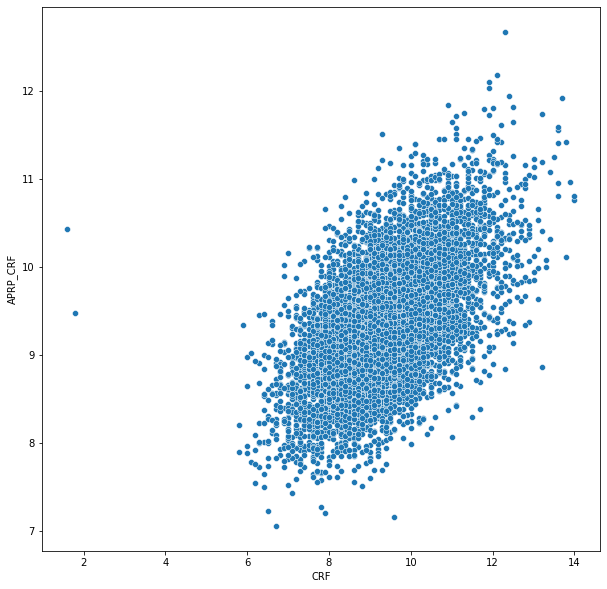

In [16]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='CRF', y='APRP_CRF', data=df_init)
plt.show()

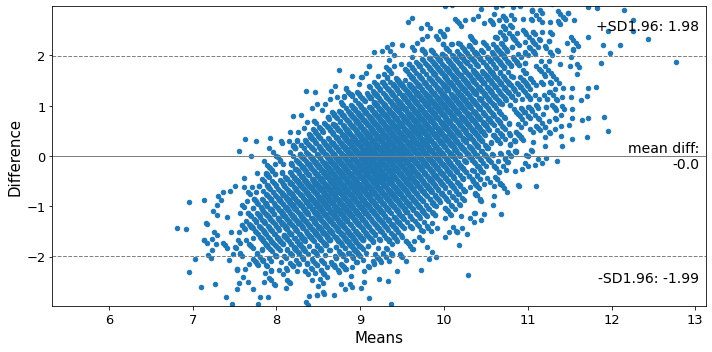

In [22]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize = (10, 5))
sm.graphics.mean_diff_plot(df_init['CRF'], df_init['ABR_CRF'], ax = ax)

plt.show()